In [1]:
from keras.datasets import cifar10

#Load cifar10 dataset (60,000 images and 10 classes)
dataset = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\Cort\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


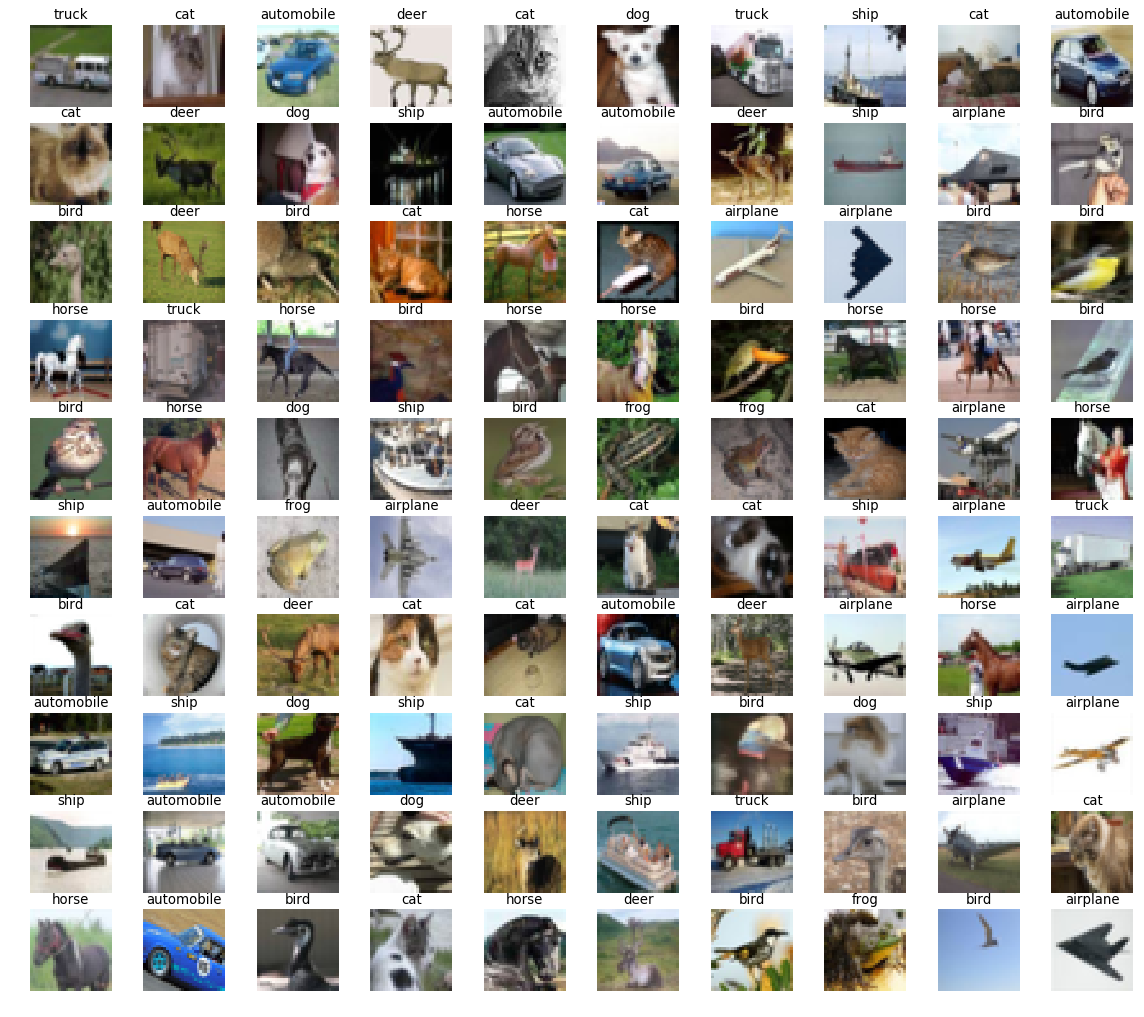

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(764)

def plot_labeled_images(imgs, lbls, rows, columns):
    #Reshape image to appropriate RGB layers
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    rgbs = imgs.astype('uint8')
    
    for i in range(0, len(rgbs)):
        img = rgbs[i]
        ax = plt.subplot(rows, columns, i+1)
        ax.axis('off')
        ax.set_title(classes[int(lbls[i])])
        ax.imshow(img, interpolation='nearest')

train_images = dataset[0][0]
train_labels = dataset[0][1]

indices = np.random.choice(range(0, len(train_labels) - 1), 100, replace=False)
imgs = train_images[indices]
lbls = train_labels[indices]

plot_labeled_images(imgs, lbls, 10, 10)

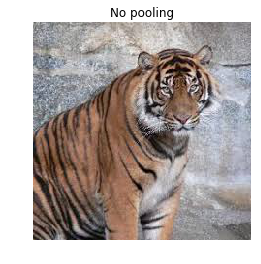

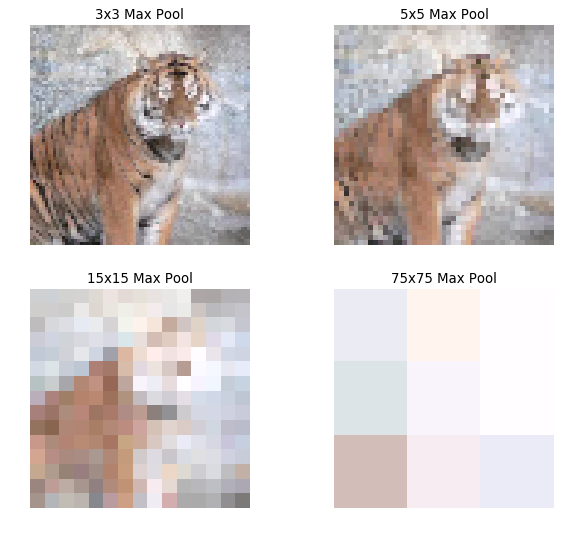

In [3]:
import tensorflow as tf
from matplotlib import image as mpimg
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

img = mpimg.imread('big_cat.jpg')
ax = plt.subplot(111)
ax.set_title('No pooling')
ax.axis('off')
ax.imshow(img)

pool_sizes = [3, 5, 15, 75]

max_pooled_imgs = []
labels = []

img_input = np.array([img])

#Show pooling on RGB image.  Stride matches the pool size (no overlap, no gaps)
for size in pool_sizes:
    pooling_model = Sequential()
    pooling_model.add(MaxPooling2D(pool_size=(size, size), input_shape=(225, 225, 3)))
    new_img = pooling_model.predict(img_input)
    
    max_pooled_imgs.append(new_img[0].astype('uint8'))
    labels.append('%sx%s Max Pool' % (str(size), str(size)))

def plot_pooled_images(imgs, lbls, rows, columns):
    plt.figure(figsize=(9, 8), dpi= 80)
    
    for i in range(0, len(imgs)):
        img = imgs[i]
        ax = plt.subplot(rows, columns, i+1)
        ax.axis('off')
        ax.set_title(labels[i])
        ax.imshow(img, interpolation='nearest')

plot_pooled_images(max_pooled_imgs, labels, 2, 2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 498us/step - loss: 2.1430 - acc: 0.1984 - val_loss: 1.9368 - val_acc: 0.3107
Epoch 2/50
50000/50000 [==============================] - 22s 441us/step - loss: 1.8327 - acc: 0.3308 - val_loss: 1.6056 - val_acc: 0.4163
Epoch 3/50
50000/50000 [==============================] - 20s 407us/step - loss: 1.6541 - acc: 0.3977 - val_loss: 1.5068 - val_acc: 0.4511
Epoch 4/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.5666 - acc: 0.4292 - val_loss: 1.4531 - val_acc: 0.4718
Epoch 5/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.5034 - acc: 0.4519 - val_loss: 1.3979 - val_acc: 0.4920
Epoch 6/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.4504 - acc: 0.4733 - val_loss: 1.3379 - val_acc: 0.5133
Epoch 7/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.4041 - acc: 0.4935 - val_loss: 1.

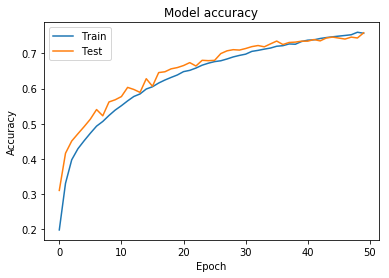

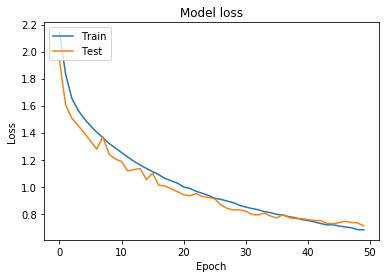

In [4]:
#Build and train model
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

num_classes = 10

x_train = dataset[0][0].astype('float32') / 255
y_train = to_categorical(dataset[0][1], num_classes=10, dtype = 'uint8')
x_test = dataset[1][0].astype('float32') / 255
y_test = to_categorical(dataset[1][1], num_classes=10, dtype = 'uint8')

test_img = x_test[5]

batchsize = 32
epochs=50
learning_rate=.01

model = Sequential()
c1 = Conv2D(filters=32, kernel_size = (4, 4), strides=1, activation='relu', input_shape=x_train.shape[1:])
c2 = Conv2D(filters=32, kernel_size = (4, 4), strides=1, activation='relu')
c3 = Conv2D(filters=64, kernel_size = (2, 2), strides=1, activation='relu')
c4 = Conv2D(filters=64, kernel_size = (2, 2), strides=1, activation='relu')

model.add(c1)
model.add(c2)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
model.add(c3)
model.add(c4)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

op = SGD(learning_rate)
model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

trained = model.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
          
model.save('saved_models/cifar10.h5')

# Plot training & validation accuracy values
plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 298us/step - loss: 2.2699 - acc: 0.1418 - val_loss: 2.2087 - val_acc: 0.2042
Epoch 2/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.1706 - acc: 0.1971 - val_loss: 2.0902 - val_acc: 0.2387
Epoch 3/50
50000/50000 [==============================] - 14s 276us/step - loss: 2.0506 - acc: 0.2304 - val_loss: 1.9561 - val_acc: 0.2741
Epoch 4/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.9398 - acc: 0.2628 - val_loss: 1.8534 - val_acc: 0.3112
Epoch 5/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.8790 - acc: 0.2910 - val_loss: 1.7838 - val_acc: 0.3367
Epoch 6/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.8247 - acc: 0.3113 - val_loss: 1.7650 - val_acc: 0.3402
Epoch 7/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.7918 - acc: 0.3253 - val_loss: 1.

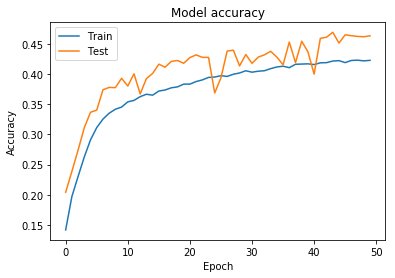

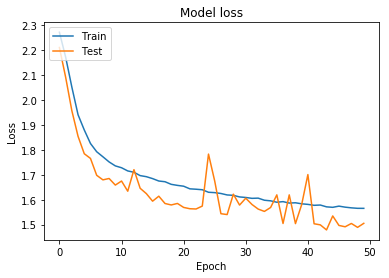

In [8]:
#Build and train model to show convolutions (before and after)
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.backend.tensorflow_backend import set_session

np.random.seed(764)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

num_classes = 10

x_train = dataset[0][0].astype('float32') / 255
y_train = to_categorical(dataset[0][1], num_classes=10, dtype = 'uint8')
x_test = dataset[1][0].astype('float32') / 255
y_test = to_categorical(dataset[1][1], num_classes=10, dtype = 'uint8')

test_img = x_test[5]

batchsize = 32
epochs=50
learning_rate=.01

vis_model = Sequential()
vis_c1 = Conv2D(filters=3, kernel_size = (4, 4), strides=1, activation='relu', input_shape=x_train.shape[1:])
vis_c2 = Conv2D(filters=3, kernel_size = (4, 4), strides=1, activation='relu')
vis_c3 = Conv2D(filters=3, kernel_size = (2, 2), strides=1, activation='relu')
vis_c4 = Conv2D(filters=3, kernel_size = (2, 2), strides=1, activation='relu')

vis_model.add(vis_c1)
vis_model.add(vis_c2)
vis_model.add(MaxPooling2D(pool_size=(2,2)))
vis_model.add(Dropout(.2))
vis_model.add(vis_c3)
vis_model.add(vis_c4)
vis_model.add(MaxPooling2D(pool_size=(2,2)))
vis_model.add(Dropout(.2))
vis_model.add(Flatten())
vis_model.add(Dense(256, activation='relu'))
vis_model.add(Dropout(.5))
vis_model.add(Dense(10, activation='softmax'))

def get_trained_layers():
    c1_model = Sequential()
    c1_model.add(vis_c1)

    c2_model = Sequential()
    c2_model.add(vis_c1)
    c2_model.add(vis_c2)
    
    c3_model = Sequential()
    c3_model.add(vis_c1)
    c3_model.add(vis_c2)
    c3_model.add(MaxPooling2D(pool_size=(2,2)))
    c3_model.add(vis_c3)
    
    c4_model = Sequential()
    c4_model.add(vis_c1)
    c4_model.add(vis_c2)
    c4_model.add(MaxPooling2D(pool_size=(2,2)))
    c4_model.add(vis_c3)
    c4_model.add(vis_c4)
    
    return (c1_model, c2_model, c3_model, c4_model)

op = SGD(learning_rate)

vis_model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

vis_trained = vis_model.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

trained_partial_models = get_trained_layers()
          
vis_model.save('saved_models/cifar10-vis-conv.h5')

for i in range(0, len(trained_partial_models)):
    trained_partial_models[i].save("saved_models/c%s_%s_training.h5" % (str(i), 'post'))

# Plot training & validation accuracy values
plt.plot(vis_trained.history['acc'])
plt.plot(vis_trained.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(vis_trained.history['loss'])
plt.plot(vis_trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

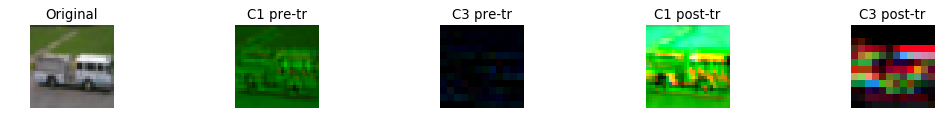

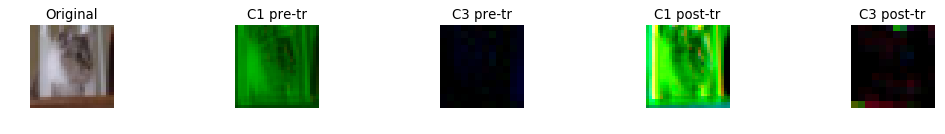

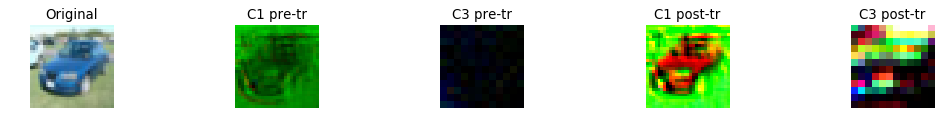

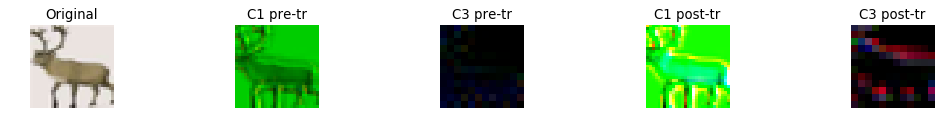

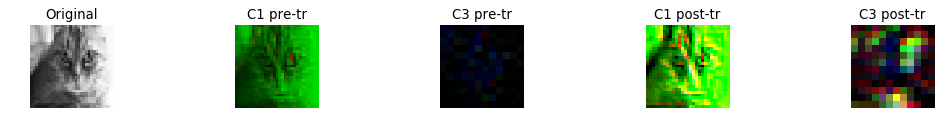

In [17]:
#Using our visualization model (kernel size of 3) show convolutions
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(764)

def get_untrained_layers():
    c1 = Conv2D(filters=3, kernel_size = (4, 4), strides=1, activation='relu', input_shape=x_train.shape[1:])
    c2 = Conv2D(filters=3, kernel_size = (4, 4), strides=1, activation='relu')
    c3 = Conv2D(filters=3, kernel_size = (2, 2), strides=1, activation='relu')
    c4 = Conv2D(filters=3, kernel_size = (2, 2), strides=1, activation='relu')
    
    c1_model = Sequential()
    c1_model.add(c1)

    c2_model = Sequential()
    c2_model.add(c1)
    c2_model.add(c2)
    
    c3_model = Sequential()
    c3_model.add(c1)
    c3_model.add(c2)
    c3_model.add(MaxPooling2D(pool_size=(2,2)))
    c3_model.add(c3)
    
    c4_model = Sequential()
    c4_model.add(c1)
    c4_model.add(c2)
    c4_model.add(MaxPooling2D(pool_size=(2,2)))
    c4_model.add(c3)
    c4_model.add(c4)
    
    return(c1_model, c2_model, c3_model, c4_model)
    
initialized_partial_models = get_untrained_layers()
c1_pre_training = initialized_partial_models[0]
c3_pre_training = initialized_partial_models[2]

c1_post_training = trained_partial_models[0]
c3_post_training = trained_partial_models[2]


titles = ['Original', 'C1 pre-tr', 'C3 pre-tr', 'C1 post-tr', 'C3 post-tr']

def fetch_intermediate_layer_output(img):
    plt.figure(figsize=(16, 8), dpi= 80)
    img_stages = []
    img_stages.append(np.array(img))
    img_stages.append(c1_pre_training.predict(np.array(img)))
    img_stages.append(c3_pre_training.predict(np.array(img)))
    img_stages.append(c1_post_training.predict(np.array(img)))
    img_stages.append(c3_post_training.predict(np.array(img)))
    return img_stages

def plot_intermediate_imgs(imgs, row, nrows, ncols):
    for i in range(0, len(imgs)):    
        img = np.clip(imgs[i][0], 0, 255).astype('uint8')
        ax = plt.subplot(nrows, ncols, row*5+i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        ax.imshow(img, interpolation='nearest')

for i in range(0, 5):
    img_stages = fetch_intermediate_layer_output([imgs[i]])
    plot_intermediate_imgs(img_stages, i, 5, 5)

    

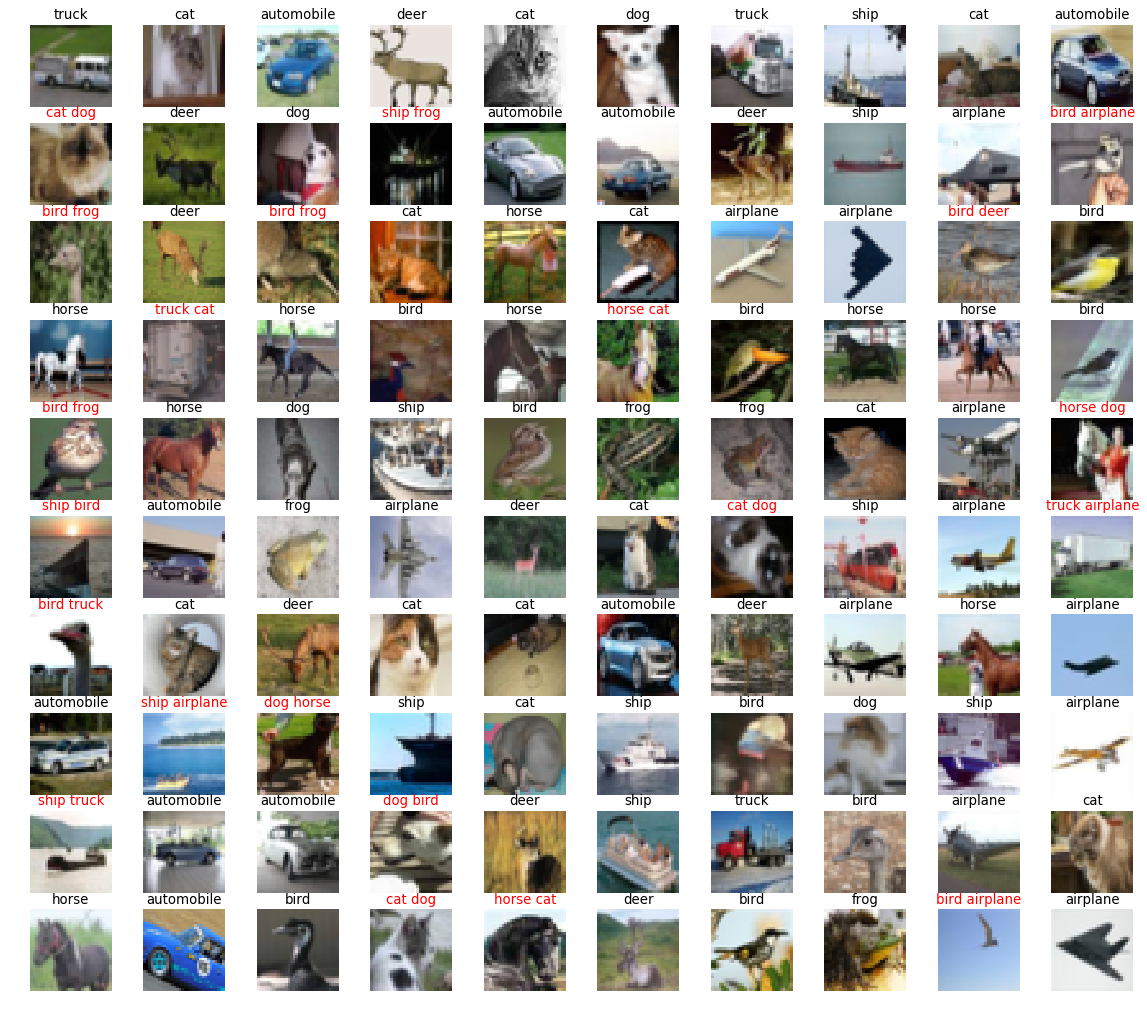

In [19]:
#Using our good model, check 100 images
from keras.models import load_model

model = load_model('saved_models/cifar10.h5')

def predict_img(img):
    y_pred = model.predict(np.array(img) / 255)
    return y_pred
    
def plot_predicted_images(imgs, act_lbls, pred_lbls, rows, columns):
    #Reshape image to appropriate RGB layers
    plt.figure(figsize=(18, 16), dpi= 80)
    rgbs = imgs.astype('uint8')
    
    for i in range(0, len(rgbs)):
        img = rgbs[i]
        ax = plt.subplot(rows, columns, i+1)
        ax.axis('off')
        act_lbl = classes[int(lbls[i])]
        if act_lbl != pred_lbls[i]:
            ax.set_title('%s %s' % (act_lbl, pred_lbls[i]), color='r')
        else:
            ax.set_title(act_lbl)
        ax.imshow(img, interpolation='nearest')

y_pred_lbls = []
for i in range(0, len(imgs)):
    y_pred = predict_img([imgs[i]])
    y_pred_lbl = classes[np.argmax(y_pred)]
    y_pred_lbls.append(y_pred_lbl)

plot_predicted_images(imgs, lbls, y_pred_lbls, 10, 10)